## Get data from kaggle and unzip

In [ ]:
!pip install -q kaggle

In [ ]:
! rm -rf ~/.kaggle

In [ ]:
from google.colab import files

files.upload()

{}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           9800       1339  0.9375           
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           1934         69  1.0              
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           6525        167  1.0              
muratkokludataset/acoustic-extinguisher-fire-

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Reading and analyzing data

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


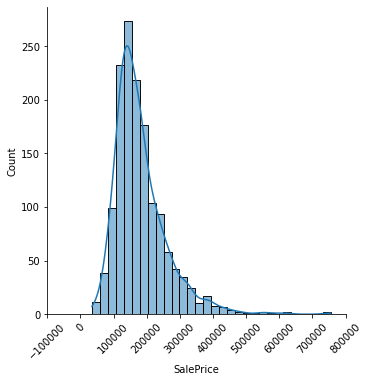

In [ ]:
ax = sns.displot(data=train, x='SalePrice', bins=30, kde=True)
ax.set_xticklabels(rotation=45)
plt.show()

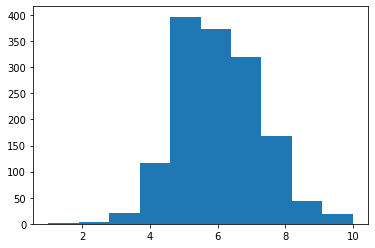

In [ ]:
plt.hist(train['OverallQual']);

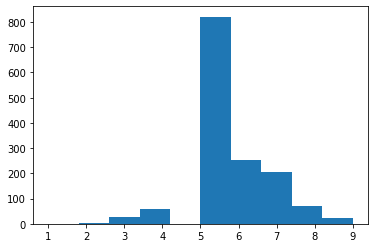

In [ ]:
plt.hist(train['OverallCond']);

In [ ]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

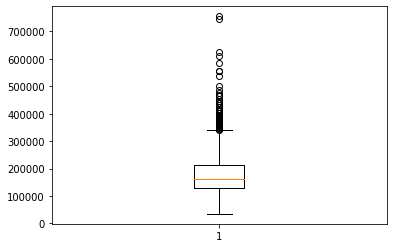

In [ ]:
plt.boxplot(train['SalePrice']);

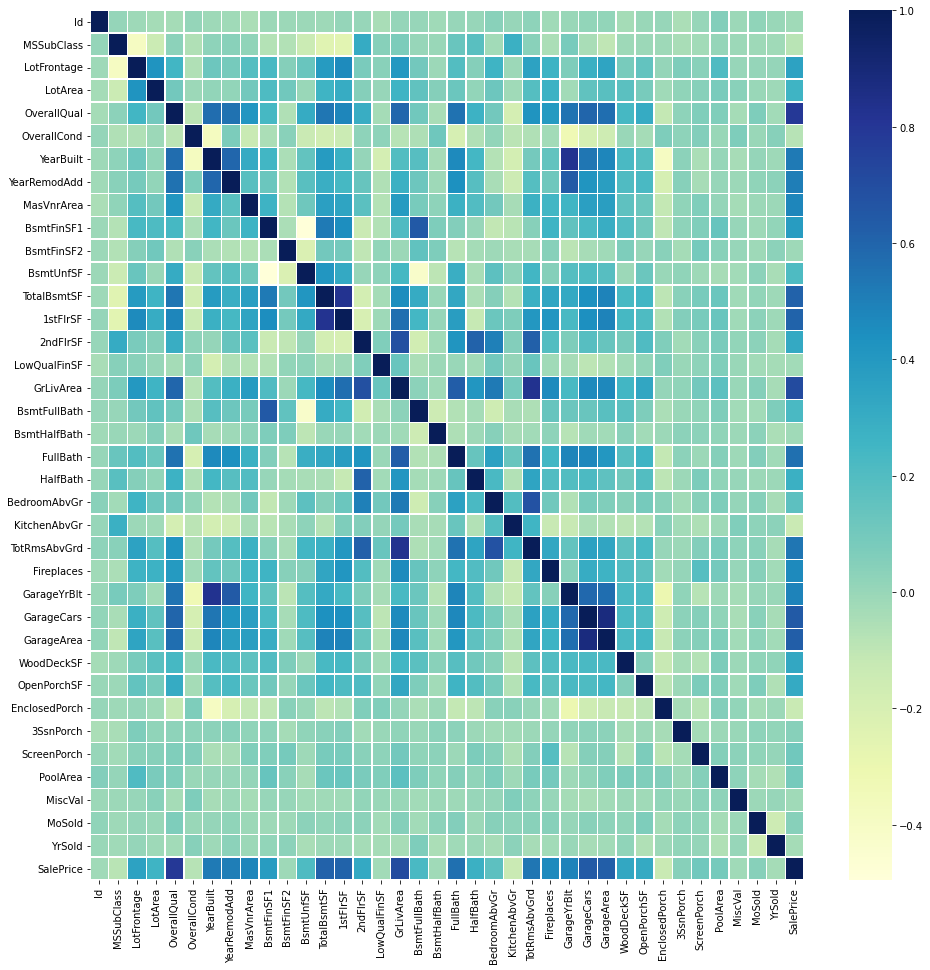

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(16,16))
sns.heatmap(train.corr(), annot=False, cmap='YlGnBu', linewidths=.5)
plt.show();

In [ ]:
train.shape

(1460, 81)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
corrmat = train.corr()
corr = pd.melt(corrmat, ignore_index=False)
corr = corr[corr.value!=1]
corr = corr[corr.variable == 'SalePrice']
corr.sort_values(by='value', ascending=False).reset_index().head(20)

,index,variable,value
0,OverallQual,SalePrice,0.790982
1,GrLivArea,SalePrice,0.708624
2,GarageCars,SalePrice,0.640409
3,GarageArea,SalePrice,0.623431
4,TotalBsmtSF,SalePrice,0.613581
5,1stFlrSF,SalePrice,0.605852
6,FullBath,SalePrice,0.560664
7,TotRmsAbvGrd,SalePrice,0.533723
8,YearBuilt,SalePrice,0.522897
9,YearRemodAdd,SalePrice,0.507101


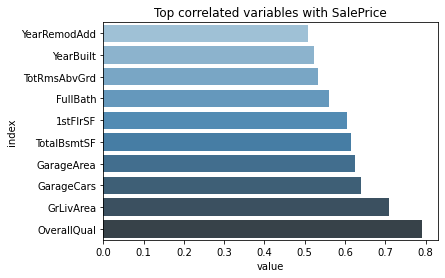

In [ ]:
sns.barplot(data=corr[corr.value > 0.5].reset_index().sort_values(by='value',ascending=True), 
            x='value' , y='index', palette="Blues_d").set(title='Top correlated variables with SalePrice');

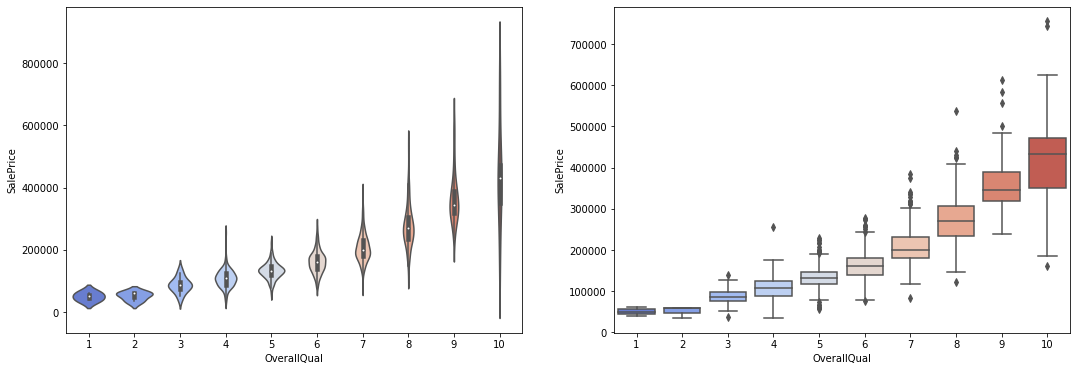

In [ ]:
figure, ax = plt.subplots(1,2, figsize = (18,6))
sns.violinplot(data=train, x = 'OverallQual', y ='SalePrice', ax = ax[0],palette='coolwarm')
sns.boxplot(data=train, x = 'OverallQual', y ='SalePrice', ax = ax[1],palette='coolwarm')
plt.show()

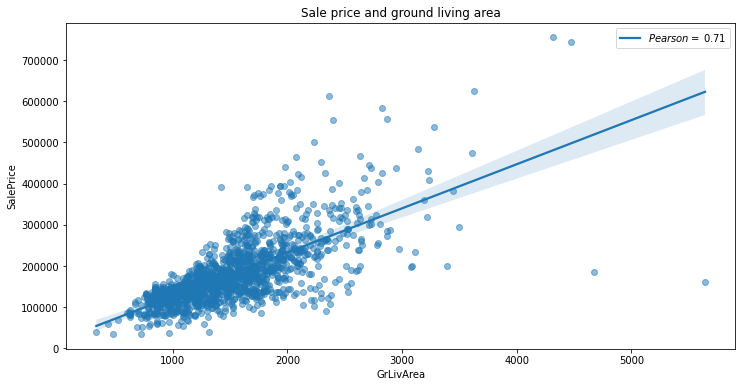

In [ ]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'GrLivArea', y ='SalePrice', scatter_kws={'alpha':0.5})
plt.title('Sale price and ground living area')
plt.legend(['$Pearson=$ {:.2f}'.format(0.71)], loc = 'best')
plt.show()

In [ ]:
train[train.columns[train.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Concat data

In [ ]:
data = pd.concat([train, test])

In [ ]:
data.MSSubClass = data.MSSubClass.astype('object')
data.MoSold = data.MoSold.astype('object')

In [ ]:
data[data.columns[data.isnull().any()]].isnull().sum()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [ ]:
data.Alley.fillna(value='No alley access', inplace=True)
data.BsmtQual.fillna(value='No Basement', inplace=True)
data.BsmtCond.fillna(value='No Basement', inplace=True)
data.BsmtExposure.fillna(value='No Basement', inplace=True)
data.BsmtFinType1.fillna(value='No Basement', inplace=True)
data.FireplaceQu.fillna(value='No Fireplace', inplace=True)
data.GarageType.fillna(value='No Garage', inplace=True)
data.GarageFinish.fillna(value='No Garage', inplace=True)
data.GarageCond.fillna(value='No Garage', inplace=True)
data.PoolQC.fillna(value='No Pool', inplace=True)
data.Fence.fillna(value='No Fence', inplace=True)
data.MiscFeature.fillna(value='None', inplace=True)
data.LotFrontage.fillna(value=0.0, inplace=True)
data.MasVnrArea.fillna(value=0.0, inplace=True)
data.MasVnrType.fillna(value='None', inplace=True)
data.BsmtFinType2.fillna(value='No Basement', inplace=True)
data.Electrical.fillna(value='SBrkr', inplace=True)
data.GarageYrBlt.fillna(value='No Garage', inplace=True)
data.GarageQual.fillna(value='No Garage', inplace=True)
data.MSZoning.fillna(value='RL', inplace=True)
data.Utilities.fillna(value='AllPub', inplace=True)
data.Exterior1st.fillna(value='Viny1Sd', inplace=True)
data.KitchenQual.fillna(value='TA', inplace=True)
data["BsmtFinSF1"] = data["BsmtFinSF1"].fillna(0.0)
data["BsmtFinSF2"] = data["BsmtFinSF2"].fillna(0.0)
data["BsmtHalfBath"] = data["BsmtHalfBath"].fillna(0.0)
data["BsmtFullBath"] = data["BsmtFullBath"].fillna(0.0)
data["GarageArea"] = data["GarageArea"].fillna(0.0)
data["SaleType"] = data["SaleType"].fillna("WD")
data["Functional"] = data["Functional"].fillna("Typ")
data["TotalBsmtSF"] = data["TotalBsmtSF"].fillna(0.0)
data["BsmtUnfSF"] = data["BsmtUnfSF"].fillna(0.0)
data["GarageCars"] = data["GarageArea"].fillna(0.0)

In [ ]:
data[data.columns[data.isnull().any()]].isnull().sum()

Exterior2nd       1
SalePrice      1459
dtype: int64

In [ ]:
finalData = pd.get_dummies(data)
finalData.shape

(2919, 434)

## Decision tree

In [ ]:
X = finalData[finalData.SalePrice.notna()].drop('SalePrice', axis=1)
y = finalData.loc[finalData.SalePrice.notna(), 'SalePrice']

In [ ]:
X.shape, y.shape

((1460, 433), (1460,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

regressor_price = DecisionTreeRegressor()
regressor_price.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
preds = regressor_price.predict(X_test)

mse(preds, y_test), mae(preds, y_test)

(1731142023.3630137, 27451.205479452055)

## RandomForest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_price = RandomForestRegressor()
random_forest_price.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
preds = random_forest_price.predict(X_test)

mse(preds, y_test), mae(preds, y_test)

(888865424.4542805, 18191.523664383563)

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

[17:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
preds = model.predict(X_test)

mse(preds, y_test), mae(preds, y_test)

(953294618.0523219, 17865.103488869863)

In [ ]:
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [4, 6, 8],
    'reg_alpha' : [1.1, 1.2, 1.3],
    'reg_lambda' : [1.1, 1.2, 1.3]
}

gs = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    n_jobs = 1,
    scoring = 'neg_mean_squared_error',
    verbose = 1
)

fitted_model = gs.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[17:33:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:33:59] WARNING: /workspace/src/objective/regr

In [ ]:
print(fitted_model.best_params_)

{'max_depth': 4, 'n_estimators': 200, 'reg_alpha': 1.1, 'reg_lambda': 1.2}


In [ ]:
print(np.sqrt(-fitted_model.best_score_))

30178.624488425532


In [ ]:
preds = fitted_model.predict(X_test)

mse(preds, y_test), mae(preds, y_test)

(908943901.803342, 16763.337957512842)

In [ ]:
best_model = xgb.XGBRegressor(max_depth=4, n_estimators=200, reg_alpha=1.3, reg_lambda=1.1)
best_model.fit(X_train, y_train)

[17:46:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=4, n_estimators=200, reg_alpha=1.3, reg_lambda=1.1)

In [ ]:
preds = best_model.predict(X_test)

mse(preds, y_test), mae(preds, y_test)

(914585394.8254704, 16875.34587703339)

## Make price be normal curve

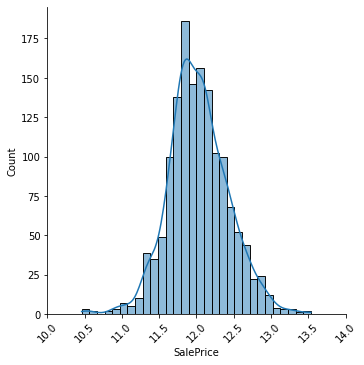

In [ ]:
ax = sns.displot(data=train, x=np.log(train['SalePrice']), bins=30, kde=True)
ax.set_xticklabels(rotation=45)
plt.show()

In [ ]:
model = xgb.XGBRegressor(max_depth=4, n_estimators=200, reg_alpha=1.3, reg_lambda=1.1)
model.fit(X_train, np.log(y_train))

[17:46:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=4, n_estimators=200, reg_alpha=1.3, reg_lambda=1.1)

In [ ]:
preds = model.predict(X_test)
mse(np.exp(preds), y_test), mae(np.exp(preds), y_test)

(1190814095.7315807, 17318.890116652397)

## Make predicts in test dataset

In [ ]:
xtest = finalData[finalData.SalePrice.isna()].drop('SalePrice', axis=1)
xtest.shape

(1459, 433)

In [ ]:
predictions = best_model.predict(xtest)

In [ ]:
predictions.shape

(1459,)

In [ ]:
results = {
    'Id' : xtest['Id'],
    'SalePrice' : predictions
}

result = pd.DataFrame(results)
result.head()

,Id,SalePrice
0,1461,131470.250000
1,1462,162951.296875
2,1463,177449.796875
3,1464,191328.609375
4,1465,189418.843750


In [ ]:
result.to_csv('submission.csv', index=False)

In [ ]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Message"

100% 21.2k/21.2k [00:01<00:00, 16.0kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques